In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

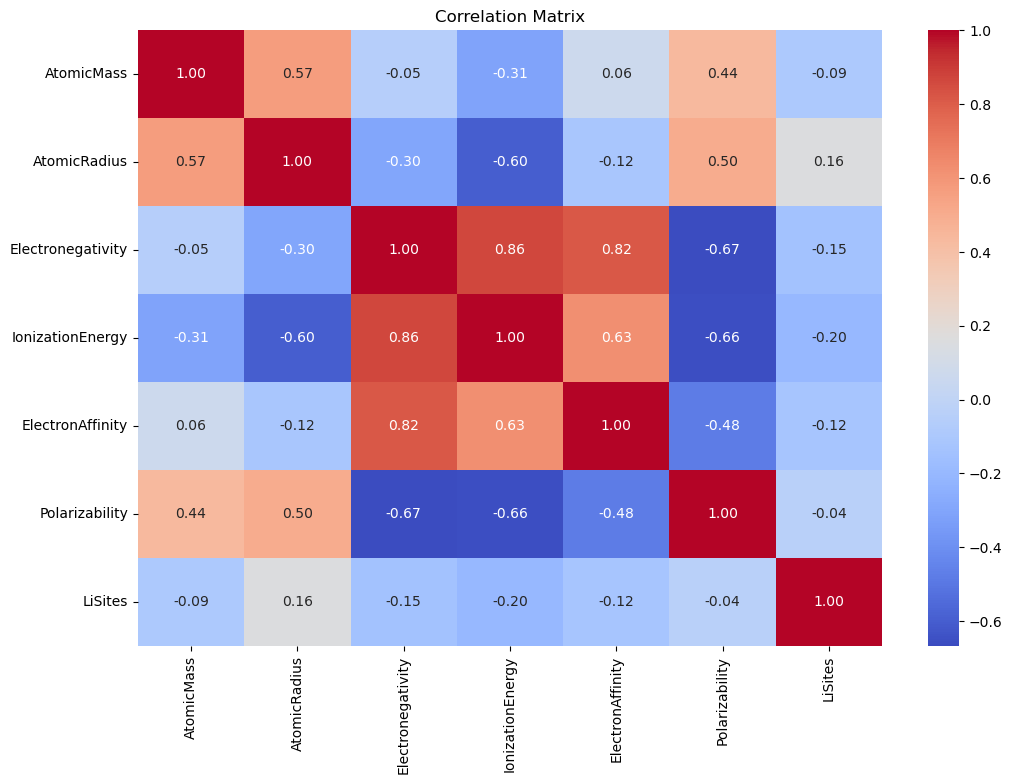

In [ ]:
df = pd.read_csv('all_props.csv')

X = df.drop(columns=['results_per_li','results_per_total','Symbol'])

Y_total = df['results_per_total']
Y_li = df['results_per_li']


X.corr()

#plot X 

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y_li, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Compute MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # MAPE in percentage

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Get feature importance (coefficients for linear regression)
features = X.columns  # Feature names
coefficients = model.coef_

# Combine into a dictionary
importance_dict = {feature: coef for feature, coef in zip(features, coefficients)}

# Sort by importance
sorted_importances = sorted(importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature importances (coefficients)

i=0
print("\nFeature Importances (Coefficients):")
for feature, coef in sorted_importances:
    print(f"{feature}: {coef:.4f}")
    i+=1
    if i>10:
        break


Mean Absolute Percentage Error (MAPE): 103.57%

Feature Importances (Coefficients):
ElectronAffinity: -0.0006
IonizationEnergy: -0.0004
AtomicRadius: -0.0001
LiSites: -0.0001
Polarizability: 0.0001
Electronegativity: -0.0001
AtomicMass: 0.0000


In [ ]:
# Get intercept (β0)
intercept = model.intercept_

# Get coefficients (β1, β2, ..., βn)
coefficients = model.coef_

# Construct the equation
equation = f"y = {intercept:.4f}"
for feature, coef in zip(X.columns, coefficients):
    equation += f" + ({coef:.4f} * {feature})"

print("Regression Equation:")
print(equation)


Regression Equation:
y = 0.0338 + (0.0000 * AtomicMass) + (-0.0001 * AtomicRadius) + (-0.0001 * Electronegativity) + (-0.0004 * IonizationEnergy) + (-0.0006 * ElectronAffinity) + (0.0001 * Polarizability) + (-0.0001 * LiSites)
